<a href="https://colab.research.google.com/gist/marcelolima381/976d7cae7983630dd43bfe83df705e19/stock-market-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install tensorflow
!pip3 install scikit-learn
!pip3 install keras
!pip3 install seaborn

# Pré-processamento de dados

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

csv_treino = pd.read_csv('https://gist.githubusercontent.com/danielfoliveira4040/0967e21eae841c98e9dfe85fe87233c7/raw/36024ec5a54b939469044eccaa22f9dadd386579/train.csv')
set_treino = csv_treino.iloc[:, 1:2].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
set_treino_normalizado = sc.fit_transform(set_treino)

x_treino = []
y_treino = []
for i in range(60, len(csv_treino)-1):
    x_treino.append(set_treino_normalizado[i-60:i, 0])
    y_treino.append(set_treino_normalizado[i, 0])
x_treino, y_treino = np.array(x_treino), np.array(y_treino)

x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1))

csv_treino

,Date,Open,High,Low,Close,Volume
0,5/9/1996,22.200001,24.400000,22.200001,23.200001,4290000
1,5/10/1996,24.000000,24.200001,23.600000,24.000000,1060000
2,5/13/1996,24.000000,24.100000,23.299999,23.900000,700000
3,5/14/1996,24.000000,24.100000,23.100000,23.600000,310000
4,5/15/1996,23.600000,23.700001,23.000000,23.200001,545000
...,...,...,...,...,...,...
5695,12/24/2018,190.699997,191.639999,187.110001,187.759995,5020600
5696,12/26/2018,188.649994,197.929993,186.100006,197.570007,7158200
5697,12/27/2018,195.600006,200.119995,191.899994,200.119995,7386800
5698,12/28/2018,200.720001,204.740005,200.199997,202.080002,5420600


In [32]:
csv_treino.describe()

,Open,High,Low,Close,Volume
count,5700.000000,5700.000000,5700.000000,5700.000000,5.700000e+03
mean,81.721481,82.288404,81.070599,81.706326,2.227972e+06
std,47.215572,47.430871,46.917311,47.181404,4.961977e+06
min,20.100000,20.360001,19.799999,20.100000,1.000000e+04
25%,47.434999,47.959999,47.000000,47.419998,5.100000e+05
50%,66.170002,66.639999,65.645001,66.130001,1.170000e+06
75%,108.430002,109.227497,108.147503,108.674999,3.363525e+06
max,224.000000,224.070007,221.300003,223.759995,3.161342e+08


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuição do Preço de Fechamento da Berkshire')

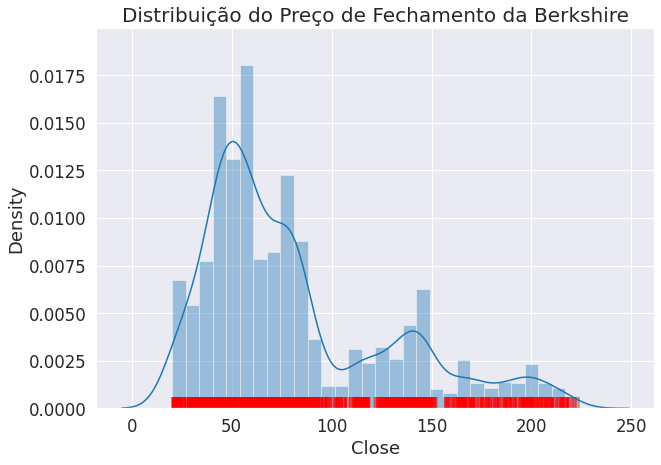

In [31]:
plt.figure(figsize=(10, 7))
sns.set_context('notebook', font_scale=1.5, rc={'font.size':20, 'axes.titlesize':20, 'axes.labelsize':18})
sns.distplot(csv_treino['Close'], 
            kde=True,
            rug=True,
            rug_kws={"color": "r", "alpha": 0.3, "linewidth": 2, "height":0.03})
sns.set_style('darkgrid')
plt.title('Distribuição do Preço de Fechamento da Berkshire')

# Compilação RNN

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_treino.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_treino, y_treino, epochs = 100, batch_size = 32)

Epoch 1/100
177/177 [==============================] - 26s 113ms/step - loss: 0.0054
Epoch 2/100
177/177 [==============================] - 20s 113ms/step - loss: 0.0019
Epoch 3/100
177/177 [==============================] - 20s 115ms/step - loss: 0.0015
Epoch 4/100
177/177 [==============================] - 20s 114ms/step - loss: 0.0011
Epoch 5/100
177/177 [==============================] - 20s 115ms/step - loss: 0.0014
Epoch 6/100
177/177 [==============================] - 20s 115ms/step - loss: 0.0012
Epoch 7/100
177/177 [==============================] - 20s 114ms/step - loss: 0.0012
Epoch 8/100
177/177 [==============================] - 20s 113ms/step - loss: 9.3254e-04
Epoch 9/100
177/177 [==============================] - 21s 116ms/step - loss: 0.0010
Epoch 10/100
177/177 [==============================] - 20s 114ms/step - loss: 0.0010
Epoch 11/100
177/177 [==============================] - 20s 113ms/step - loss: 8.4635e-04
Epoch 12/100
177/177 [==============================] -

# Previsões

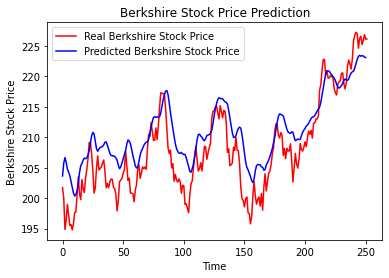

In [ ]:
csv_teste = pd.read_csv('https://gist.githubusercontent.com/danielfoliveira4040/7424ec86d261e7562c96f67e2aba5f96/raw/876d69dc0d07f6cc4acf6a23de168fd1098df1d7/test.csv')
preco_real_acao = csv_teste.iloc[:, 1:2].values

dataset_total = pd.concat((csv_treino['Open'], csv_teste['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(csv_teste) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_teste = []

for i in range(60, 60+len(csv_teste)-1):
    x_teste.append(inputs[i-60:i, 0])

x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))
previsao_preco_acao = regressor.predict(x_teste)
previsao_preco_acao = sc.inverse_transform(previsao_preco_acao)


plt.plot(preco_real_acao, color = 'red', label = 'Real Berkshire Stock Price')
plt.plot(previsao_preco_acao, color = 'blue', label = 'Predicted Berkshire Stock Price')
plt.title('Berkshire Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Berkshire Stock Price')
plt.legend()
plt.show()


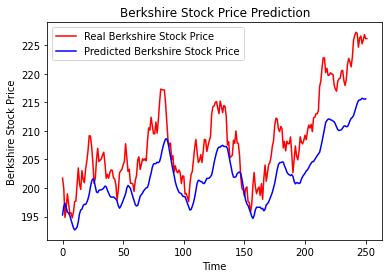

Os resultados acima foram atingidos a partir de um treinamento com os dados de 1996 a 2018 e um teste com o ano completo de 2019. Conseguimos resultados bastante atrativos, apesar de não utilizáveis na prática

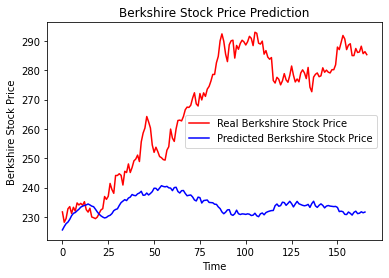